## Анализ цен на ноутбуки в зависимости от их характеристик

Для анализа представлен набор данных с подробным описанием характеристик ноутбуков: диагональ экрана, модель процессора,
объем оперативной памяти, графический процессор, объем встроенной памяти, операционная система, вес и цена. 
Небходимо рассмотреть характеристики и тенденции их влияния на ценообразование. Понять взаимосвязь между функциональностью устройства и его
ценой.

Анализ разделим на четыре этапа:

1. Обзор данных
2. Предварительная очистка и обработка данных
3. Анализ данных
4. Выводы

### Обзор данных

In [19]:
# Импортирование библиотек
import numpy as np
import pandas as pd
import matplotlib as mlp
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")

%matplotlib inline

In [20]:
data = pd.read_csv('laptop_data.csv')

In [21]:
data.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [22]:
list(data.columns.values)

['Unnamed: 0',
 'Company',
 'TypeName',
 'Inches',
 'ScreenResolution',
 'Cpu',
 'Ram',
 'Memory',
 'Gpu',
 'OpSys',
 'Weight',
 'Price']

In [23]:
len(list(data.columns.values))

12

Дата фрейм содержит 12 столбцов описывающих характеристики ноутбуков:

- **Unnamed: 0** - безъимянный столбец
- **Company** - компания производитель ноутбука
- **TypeName** - тип ноутбука
- **Inches** - диагональ монитора
- **ScreenResolution** - разрешение и тип экрана
- **Cpu** - процессор ноутбука
- **Ram** - объем опреративной памяти ноутбука
- **Memory** - объем встроенной памяти и тип накопителя
- **Gpu** - графический процессор
- **OpSys** - операционная система
- **Weight** - вес ноутбука
- **Price** - цена

In [24]:
data.describe()

,Unnamed: 0,Inches,Price
count,1303.00000,1303.000000,1303.000000
mean,651.00000,15.017191,59870.042910
std,376.28801,1.426304,37243.201786
min,0.00000,10.100000,9270.720000
25%,325.50000,14.000000,31914.720000
50%,651.00000,15.600000,52054.560000
75%,976.50000,15.600000,79274.246400
max,1302.00000,18.400000,324954.720000


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


В ходе обзора набора данных видим что датафрейм имеет три типа данных: int64, float64, object. Предварительно не понятно назначение столбца 
'Unnamed: 0'. 
Будем проводить дальнейшую проверку на наличие отсутствующих значений, удаление дубликатов при наличии, возможно  потребуется провести группировку данных
для наглядности.

### Предварительная очистка и обработка данных

Приведём названия столбцов к так называемому "хорошему стилю", то есть приведём к нижнему регистру, разделим слова
нижним подчеркиванием.

In [26]:
data.columns = data.columns.str.lower()
data = data.rename(columns = {'unnamed: 0': 'unmamed', 'typename': 'type_name', 'screenresolution': 'screen_resolution',
                             'opsys': 'op_sys'})

In [27]:
data.columns

Index(['unmamed', 'company', 'type_name', 'inches', 'screen_resolution', 'cpu',
       'ram', 'memory', 'gpu', 'op_sys', 'weight', 'price'],
      dtype='object')

Столбец "unmamed" не содержит важной информации- удалим его

In [28]:
data.drop(columns=['unmamed'], inplace = True)

Проверяем данные на дубликаты

In [29]:
data.duplicated().sum()

29

In [30]:
data.drop_duplicates(keep = 'first', inplace = True)

Проверяем данные на нулевые значения

In [31]:
data.isnull().sum()

company              0
type_name            0
inches               0
screen_resolution    0
cpu                  0
ram                  0
memory               0
gpu                  0
op_sys               0
weight               0
price                0
dtype: int64

### Анализ данных

**Рассмотрим распределение количество ноутбуков в ценовом диапазоне**

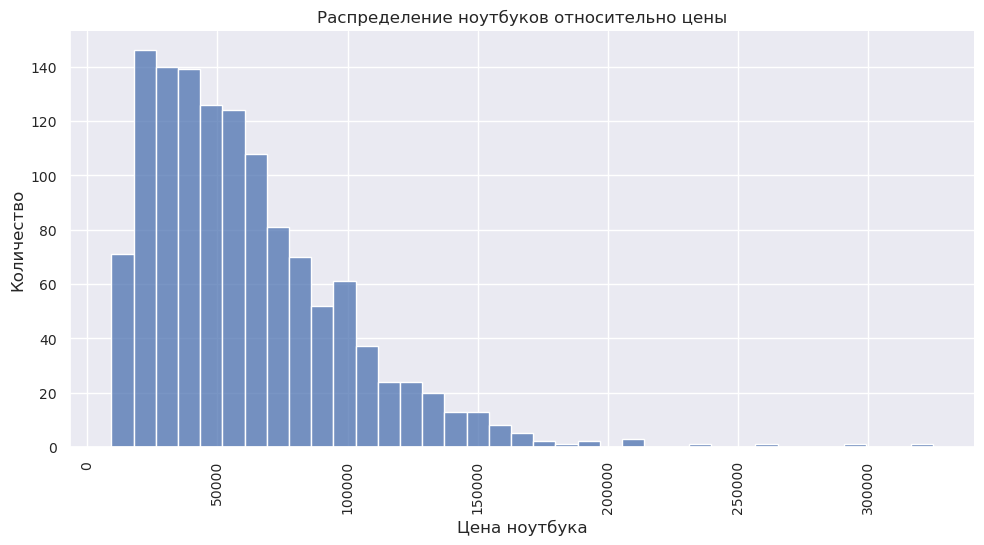

In [77]:
sns.set()
sns.set_palette('deep')
sns.set_style('darkgrid')
sns.set(rc={'xtick.labelsize':10,'ytick.labelsize':10})
sns.displot(data['price'], height = 5, aspect = 2)
plt.xticks(rotation = 90)
plt.title('Распределение ноутбуков относительно цены')
plt.xlabel('Цена ноутбука')
plt.ylabel('Количество')
plt.grid(True)
plt.show()

Наблюдается неравномерное распределение. Наибольшее количество ноутбуков находится в ценовом диапазоне от 40000 до 70000.
Свыше 150000 - очень малое количество, а свыше 200000 - единичные экземпляры

**Рассмотрим распределение количества по производителям**

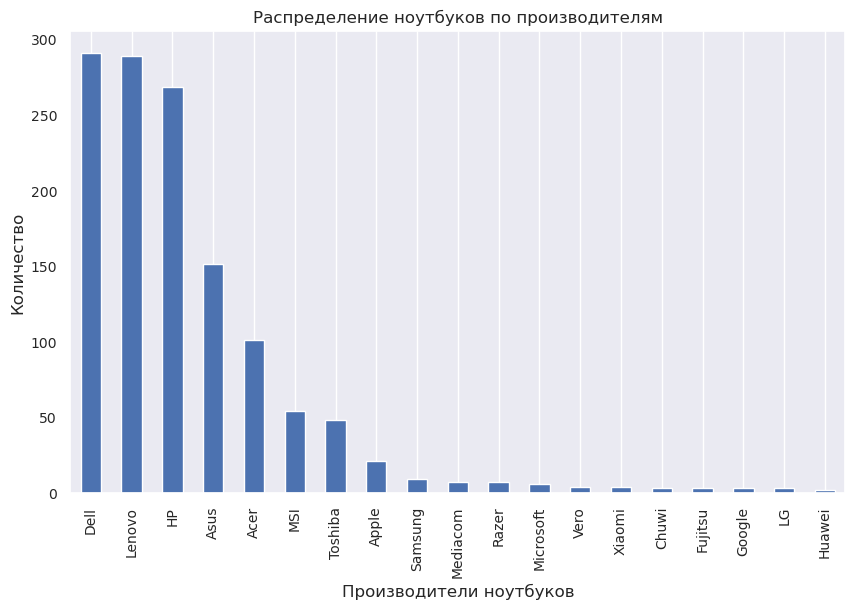

In [33]:
plt.figure(figsize = (10, 6))
data['company'].value_counts().plot(kind = 'bar')
plt.title('Распределение ноутбуков по производителям')
plt.xlabel('Производители ноутбуков')
plt.ylabel('Количество')
plt.grid(axis = 'y')
plt.show()

В штучном выражении наибольшая доля принадлежит тройке производителей: Dell, Lenovo, Hp. У данных производителей наиболее
разнообразный ассортимент ноутбуков

**Рассмотрим соотношение цены к производителю ноутбука**

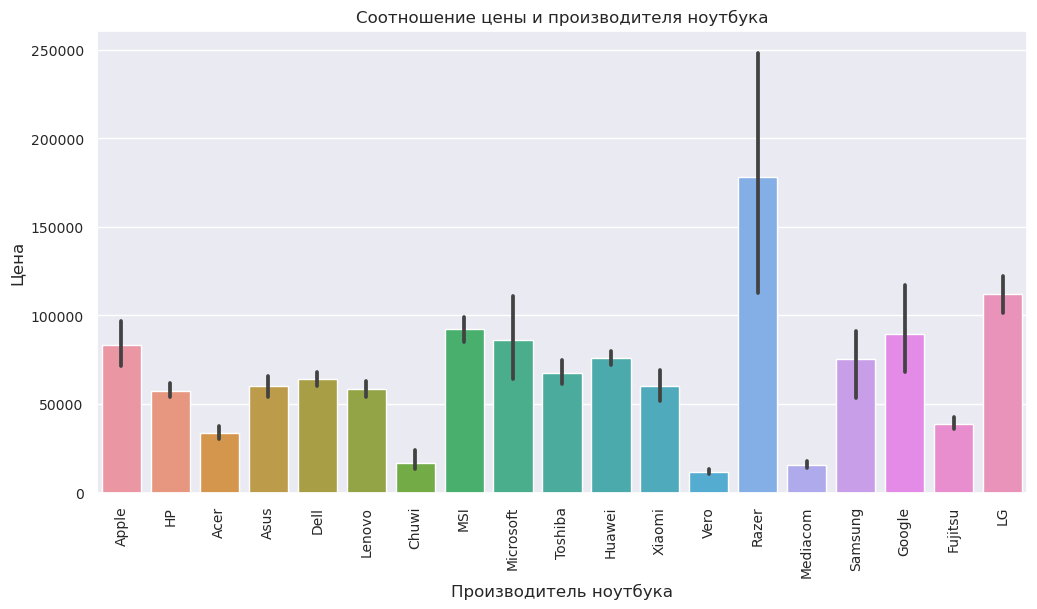

In [34]:
plt.figure(figsize = (12, 6))
sns.barplot(x = data['company'], y = data['price'])
plt.xticks(rotation = 90)
plt.title('Соотношение цены и производителя ноутбука')
plt.xlabel('Производитель ноутбука')
plt.ylabel('Цена')
plt.show()

На первом месте по цене ноутбуков - производитель Razer, который специализируется на производстве высокроизводительных
игровых ноутбуков. Далее идет LG и на третьем месте MSI.
В ходе анализа получаем следующее: наибольшую цену имеют ноутбуки специализированного направления: игровые, рабочие станции, имеджевые ультрабуки. Доля таких продуктов не велика. В массовом же сегменте с большим ассортментом средняя цена колеблется в районе 50000. 

**Рассмотрим распределение по типам ноутбуков**

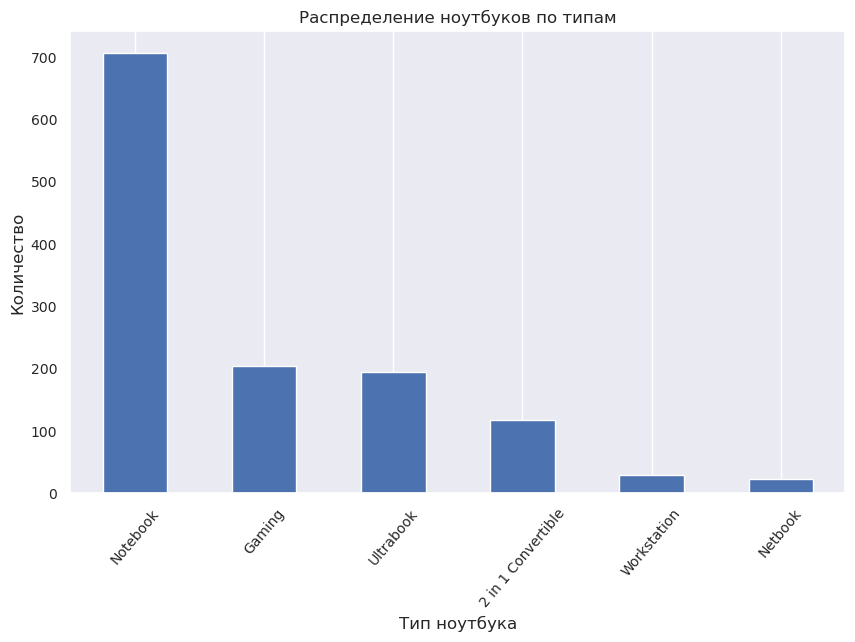

In [35]:
plt.figure(figsize = (10, 6))
data['type_name'].value_counts().plot(kind = 'bar')
plt.title('Распределение ноутбуков по типам')
plt.xlabel('Тип ноутбука')
plt.ylabel('Количество')
plt.xticks(rotation = 50)
plt.grid(axis = 'y')
plt.show()

Самая распространенная категория обычные ноутбуки, следующие две позиции- это игровые ноутбуки и ультрабуки. Самая маленькая доля у нетбуков.

**Проанализируем зависимость цены ноутбука от типа**

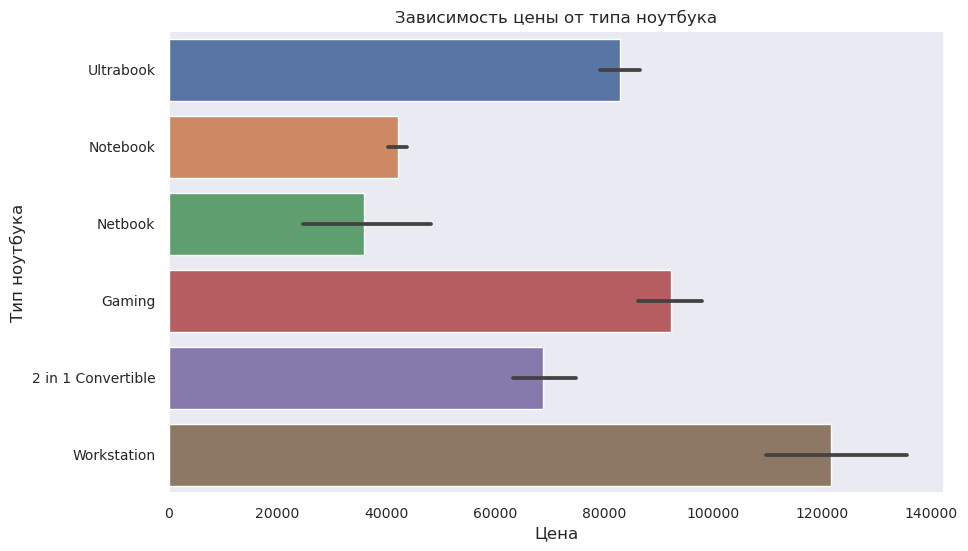

In [36]:
plt.figure(figsize = (10, 6))
sns.barplot(x = data['price'], y = data['type_name'])
plt.title('Зависимость цены от типа ноутбука')
plt.xlabel('Цена')
plt.ylabel('Тип ноутбука')
plt.grid(axis = 'x')
plt.show()

На первом месте по стоимости находятся рабочие станции- высокопроизводительные решения для специализированных рабочих задач.
На втором месте игровые ноутбуки- высокопроизводительные решения для подходящие для игровой области
И на третьем месте находятся ультрабуки

**Разрешение и тип экрана ноутбука**

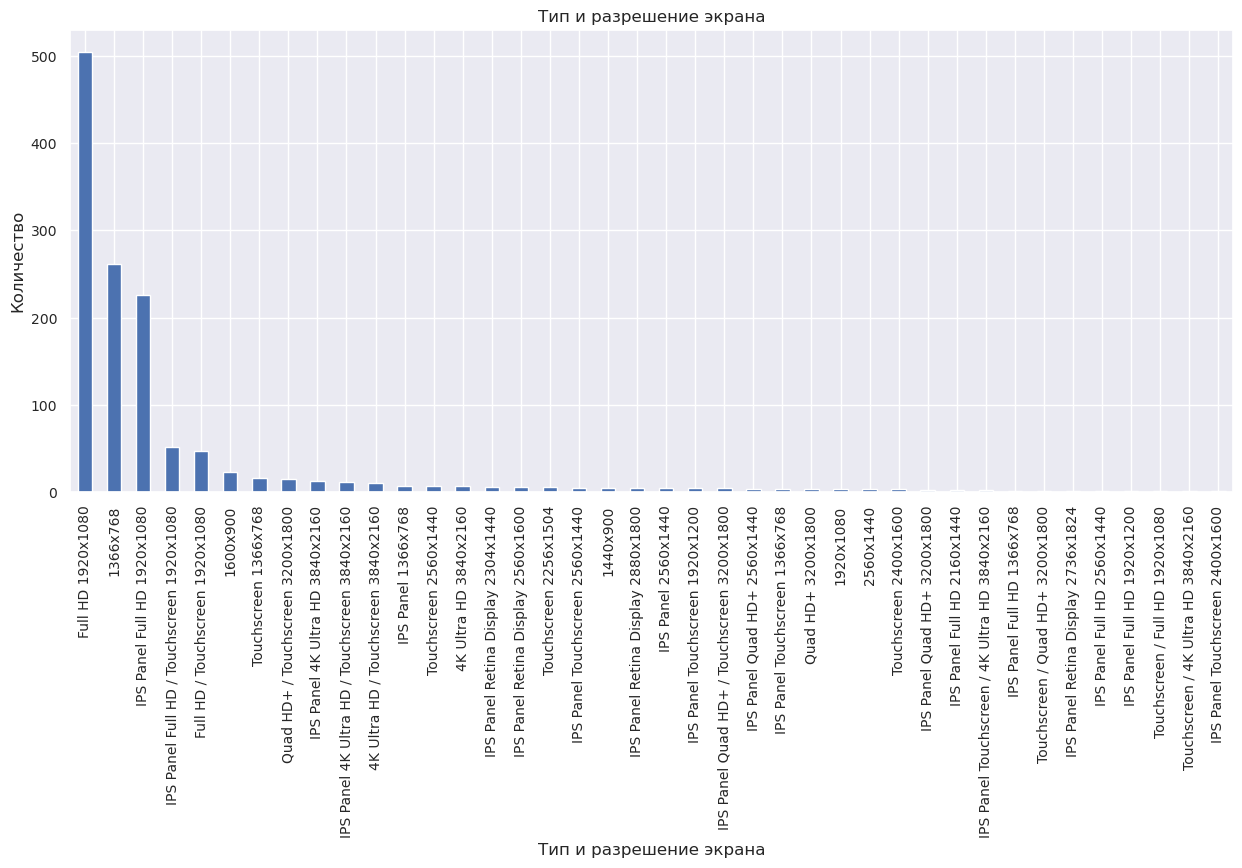

In [37]:
plt.figure(figsize = (15, 6))
data['screen_resolution'].value_counts().plot(kind = 'bar')
plt.title('Тип и разрешение экрана')
plt.xlabel('Тип и разрешение экрана')
plt.ylabel('Количество')
plt.show()

Диагональ экрана ноутбука

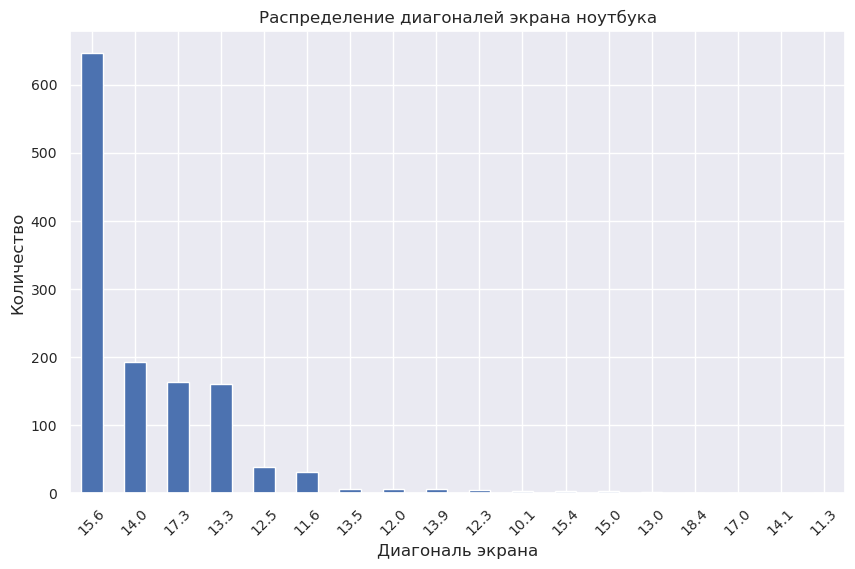

In [38]:
plt.figure(figsize = (10, 6))
data['inches'].value_counts().plot(kind = 'bar')
plt.xticks(rotation = 45)
plt.title('Распределение диагоналей экрана ноутбука')
plt.xlabel('Диагональ экрана')
plt.ylabel('Количество')
plt.show()

Наиболее распространены ноутбуки с экраном диагональю 15.6 дюймов, затем 14 и 17.3

Рассмотрим зависимость цены от диагонали экрана ноутбука

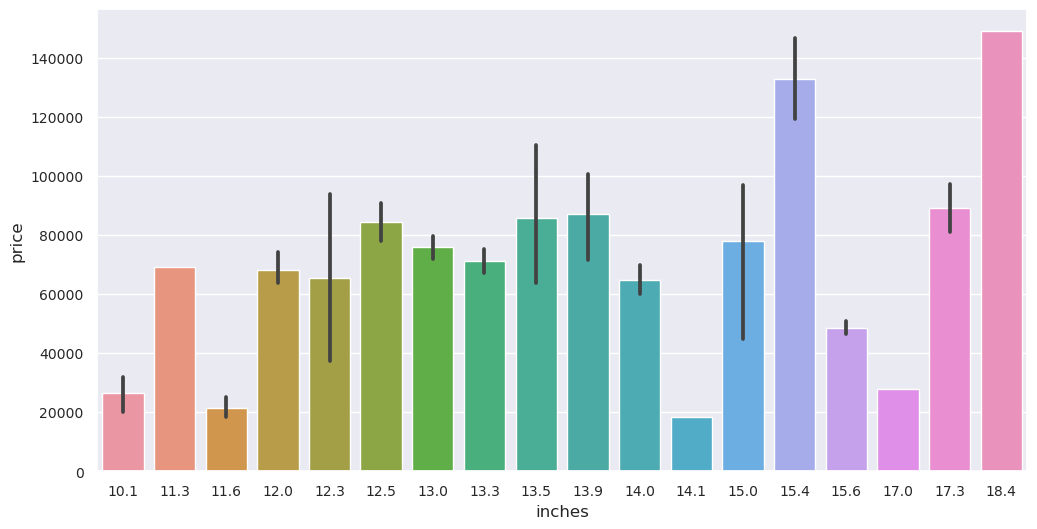

In [39]:
plt.figure(figsize = (12, 6))
sns.barplot(x = data['inches'], y = data['price'])
plt.show()

По цене резко отличаются от остальных - ноутбуки с не распространенным разрешением экрана: 18.4, 15.4. Цена на ноутбуки
с самым распространенным экраном 15.6 находится ближе к нижней границе ценового диапазона.

По типу экрана ноутбуки делятся на: ноутбуки с сенсорным экраном и ноутбуки с обычным экраном

Проанализируем зависимость цены ноутбука от типа экрана. Для этого создадим отдельный столбец, где будем указывать
наличие или отсутствие сенсорного дисплея

* 1 - Сенсорный дисплей
* 0 - Обычный дисплей 

In [40]:
data['type_screen'] = data['screen_resolution'].apply(lambda x: 1 if 'Touchscreen' in x else 0)

In [41]:
data.sample(n=10)

,company,type_name,inches,screen_resolution,cpu,ram,memory,gpu,op_sys,weight,price,type_screen
342,HP,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i3 7100U 2.4GHz,8GB,1TB HDD,Nvidia GeForce 930MX,Windows 10,2.1kg,38148.480,0
886,Dell,Notebook,15.6,1366x768,Intel Core i3 6006U 2.0GHz,4GB,1TB HDD,AMD Radeon R5 M420X,Linux,2.18kg,24279.696,0
603,MSI,Gaming,17.3,Full HD 1920x1080,Intel Core i7 6820HK 2.7GHz,16GB,128GB SSD + 1TB HDD,Nvidia GeForce GTX 970M,Windows 10,4.14kg,117162.720,0
656,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8GB,256GB SSD,AMD Radeon 530,Windows 10,2.2kg,48964.320,0
559,Dell,Notebook,15.6,1366x768,Intel Core i3 6006U 2GHz,4GB,1TB HDD,AMD Radeon R5 M420,Windows 10,2.18kg,32921.712,0
877,Xiaomi,Ultrabook,13.3,IPS Panel Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,8GB,256GB SSD,Nvidia GeForce 940MX,Windows 10,1.28kg,49816.800,0
284,Acer,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8GB,256GB SSD,Nvidia GeForce MX150,Windows 10,3kg,50669.280,0
160,Asus,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4GB,1TB HDD,AMD Radeon R5 M420,Windows 10,2.03kg,21471.840,0
182,Lenovo,2 in 1 Convertible,13.9,IPS Panel 4K Ultra HD / Touchscreen 3840x2160,Intel Core i7 8550U 1.8GHz,16GB,512GB SSD,Intel UHD Graphics 620,Windows 10,1.4kg,98514.720,1
1028,Dell,Ultrabook,13.3,Quad HD+ / Touchscreen 3200x1800,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.29kg,86526.720,1


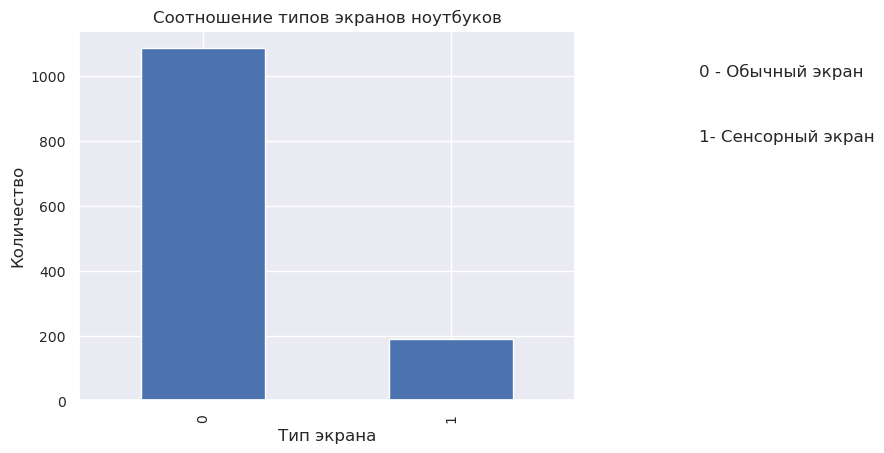

In [42]:
plt.figure()
data['type_screen'].value_counts().plot(kind='bar')
plt.title('Соотношение типов экранов ноутбуков')
plt.xlabel('Тип экрана')
plt.ylabel('Количество')
plt.text(2, 1000, '0 - Обычный экран')
plt.text(2, 800, '1- Сенсорный экран')
plt.show()

Ноутбкуки с сеносорным экранам занимаю малую долю в штучном выражение. Такие решения находятся в не массовом сегменте.
Данные экраны устанавливаются в  некоторые ультрабуки, а также в решения 2 в 1

Влияние сенсорного экрана на цену ноутбука:

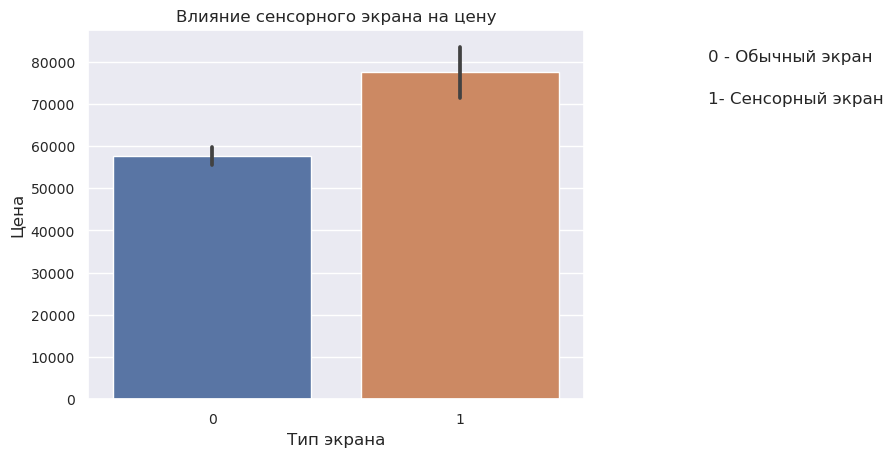

In [43]:
plt.figure()
sns.barplot(x = data['type_screen'], y = data['price'])
plt.title('Влияние сенсорного экрана на цену')
plt.xlabel('Тип экрана')
plt.ylabel('Цена')
plt.text(2, 80000, '0 - Обычный экран')
plt.text(2, 70000, '1- Сенсорный экран')
plt.show()

Сенсорный экран увеличивает стоимость ноутбука

Создадим столбцы с разрешением экрана

In [44]:
data['resolution'] = data['screen_resolution'].apply(lambda x: x.split()[-1])
data['resolution_x'] = data['resolution'].apply(lambda x: x.split('x')[0])
data['resolution_y'] = data['resolution'].apply(lambda x: x.split('x')[1])

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1274 entries, 0 to 1273
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   company            1274 non-null   object 
 1   type_name          1274 non-null   object 
 2   inches             1274 non-null   float64
 3   screen_resolution  1274 non-null   object 
 4   cpu                1274 non-null   object 
 5   ram                1274 non-null   object 
 6   memory             1274 non-null   object 
 7   gpu                1274 non-null   object 
 8   op_sys             1274 non-null   object 
 9   weight             1274 non-null   object 
 10  price              1274 non-null   float64
 11  type_screen        1274 non-null   int64  
 12  resolution         1274 non-null   object 
 13  resolution_x       1274 non-null   object 
 14  resolution_y       1274 non-null   object 
dtypes: float64(2), int64(1), object(12)
memory usage: 159.2+ KB


In [46]:
data['resolution_x'] = data['resolution_x'].astype('int64')
data['resolution_y'] = data['resolution_y'].astype('int64')

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1274 entries, 0 to 1273
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   company            1274 non-null   object 
 1   type_name          1274 non-null   object 
 2   inches             1274 non-null   float64
 3   screen_resolution  1274 non-null   object 
 4   cpu                1274 non-null   object 
 5   ram                1274 non-null   object 
 6   memory             1274 non-null   object 
 7   gpu                1274 non-null   object 
 8   op_sys             1274 non-null   object 
 9   weight             1274 non-null   object 
 10  price              1274 non-null   float64
 11  type_screen        1274 non-null   int64  
 12  resolution         1274 non-null   object 
 13  resolution_x       1274 non-null   int64  
 14  resolution_y       1274 non-null   int64  
dtypes: float64(2), int64(3), object(10)
memory usage: 159.2+ KB


**Распределение ноутбуков по разрешению экрана**

Разрешение экрана ноутбука увеличивается равномерно. При увеличении количества пикселей одной стороны- увеличивается
количество пикселей по другой стороне. Хотя это увеличение не всегда имеет одну и ту же пропорцию, в данном случае мы можем
принять за показатель разрешения экрана одну из сторон и размер второй в данном анализе опустим.

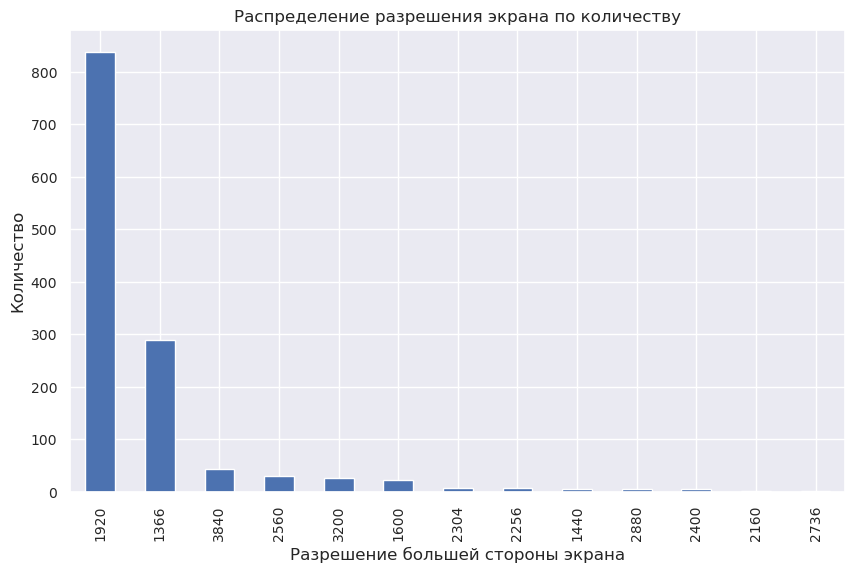

In [48]:
plt.figure(figsize = (10, 6))
data['resolution_x'].value_counts().plot(kind = 'bar')
plt.title('Распределение разрешения экрана по количеству')
plt.xlabel('Разрешение большей стороны экрана')
plt.ylabel('Количество')
plt.show()

Зависимоть цены ноутбука от разрешения экрана

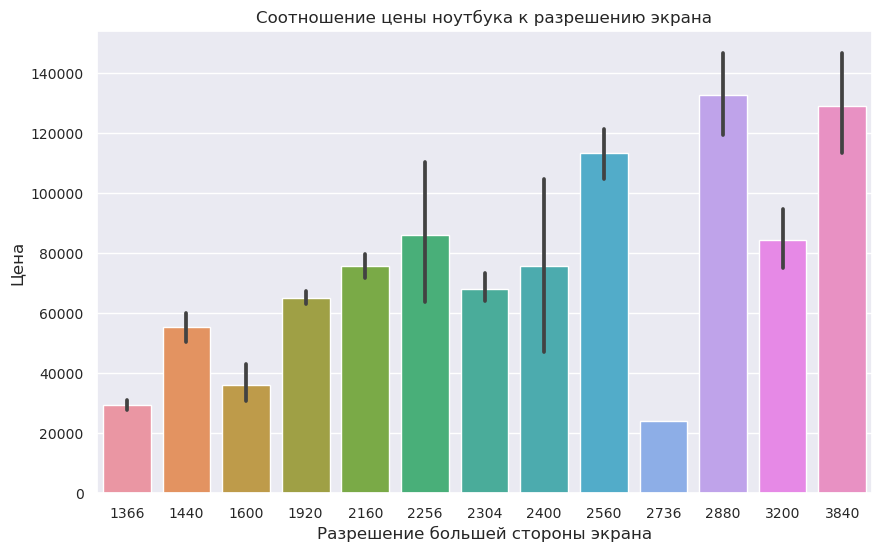

In [49]:
plt.figure(figsize = (10, 6))
sns.barplot(x = data['resolution_x'], y = data['price'])
plt.title('Соотношение цены ноутбука к разрешению экрана')
plt.xlabel('Разрешение большей стороны экрана')
plt.ylabel('Цена')
plt.show()

С увеличением разрешения экрана- увеличивается цена ноутбука

Кроме диагонали и разрещения экрана ноутбука есть различия в типе панели экрана ноутбука то есть по какой технологии изготовлен сам экран.
Создадим столбец в который поместим данные о типе экрана ноутбука

In [50]:
data['screen_process'] = data['screen_resolution'].apply(lambda x: 1 if 'IPS' in x else 0)

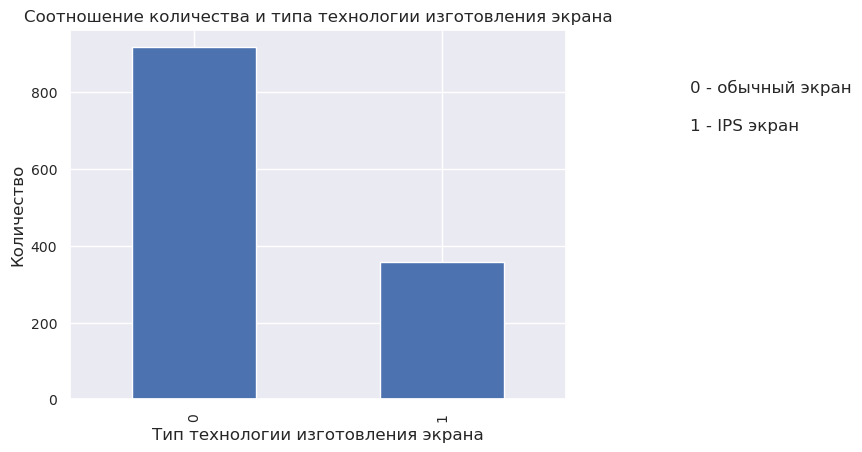

In [78]:
plt.figure()
data['screen_process'].value_counts().plot(kind = 'bar')
plt.title('Соотношение количества и типа технологии изготовления экрана')
plt.xlabel('Тип технологии изготовления экрана')
plt.ylabel('Количество')
plt.text(2, 800, '0 - обычный экран')
plt.text(2, 700, '1 - IPS экран')
plt.show()

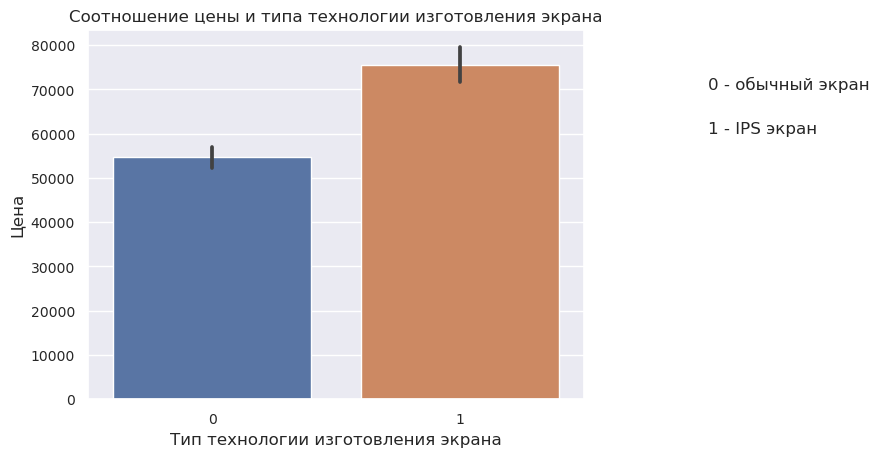

In [52]:
plt.figure()
sns.barplot(x = data['screen_process'], y = data['price'])
plt.title('Соотношение цены и типа технологии изготовления экрана')
plt.xlabel('Тип технологии изготовления экрана')
plt.ylabel('Цена')
plt.text(2, 70000, '0 - обычный экран')
plt.text(2, 60000, '1 - IPS экран')
plt.show()

Создадим столбец с численным значением оперативной памяти:


In [53]:
data['ram_decimal'] = data['ram'].apply(lambda x: x.replace('GB', ''))

In [54]:
data['ram_decimal'] = data['ram_decimal'].astype('int64')

**Количество оперативной памяти в ноутбуках**

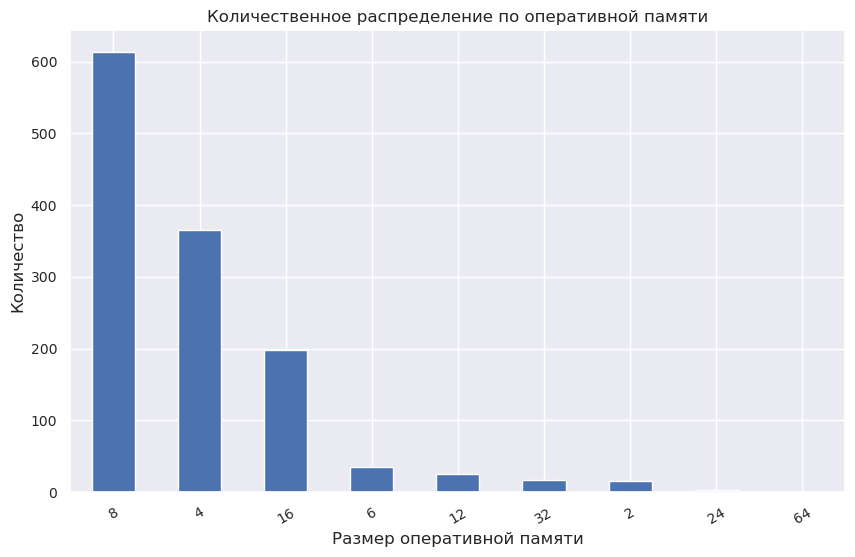

In [55]:
plt.figure(figsize = (10, 6))
data['ram_decimal'].value_counts().plot(kind='bar')
plt.xticks(rotation = 30)
plt.xlabel('Размер оперативной памяти')
plt.ylabel('Количество')
plt.title('Количественное распределение по оперативной памяти')
plt.show()

Стоимость ноутбуков в зависимости от размеров встроенной памяти

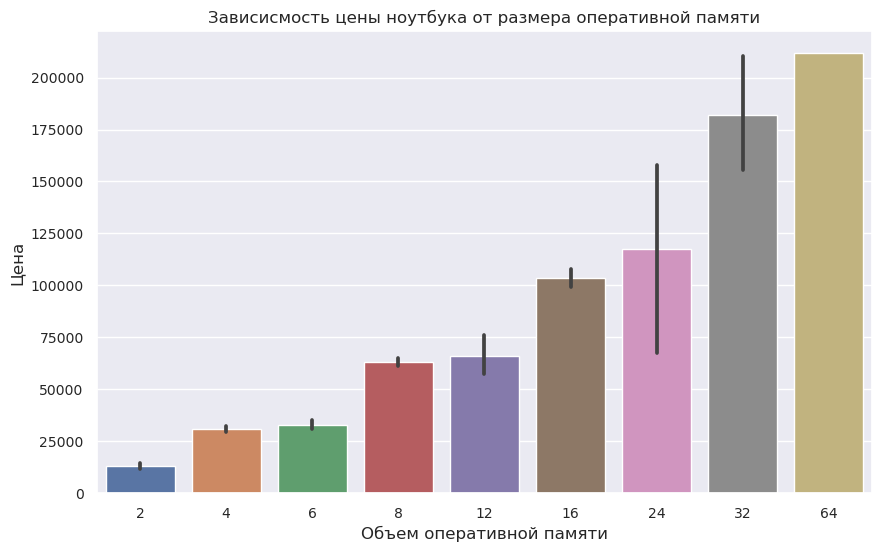

In [56]:
plt.figure(figsize=(10, 6))
sns.barplot(x=data['ram_decimal'], y=data['price'])
plt.title('Зависисмость цены ноутбука от размера оперативной памяти')
plt.xlabel('Объем оперативной памяти')
plt.ylabel('Цена')
plt.show()

С увеличением в оперативной памяти происходит увеличение стоимости ноутбука

**Встроенная память ноутбуков**

Создадим столбец с типом памяти

In [57]:
def memory_rename(string):
    if 'HDD' in string:
        return 1
    elif 'SSD' in string:
        return 2
    elif 'HDD' and 'SDD' in string:
        return 3
    else:
        return 0

In [58]:
data['memory_type'] = data['memory'].apply(memory_rename)

Рассмотрим соотношение типов памяти

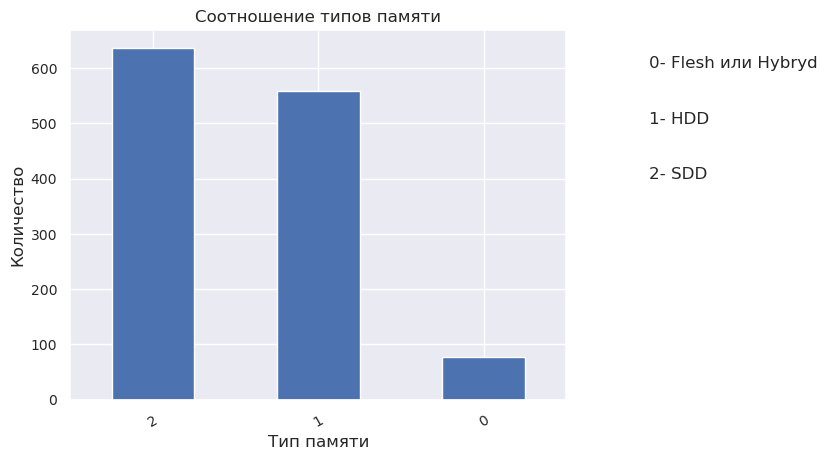

In [59]:
plt.figure()
data['memory_type'].value_counts().plot(kind='bar')
plt.title('Соотношение типов памяти')
plt.xlabel('Тип памяти')
plt.ylabel('Количество')
plt.xticks(rotation=30)
plt.text(3, 600, '0- Flesh или Hybryd')
plt.text(3, 500, '1- HDD')
plt.text(3, 400, '2- SDD')
plt.show()

Стоимость ноутбука в зависимости от типа памяти

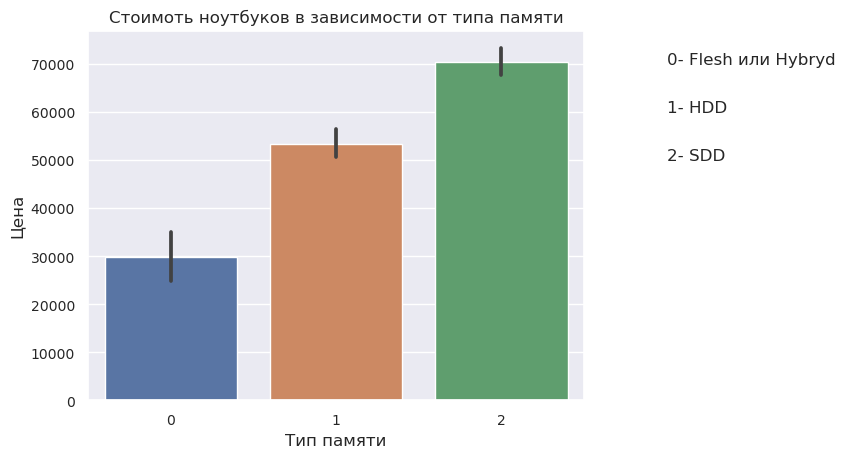

In [60]:
plt.figure()
sns.barplot(x = data['memory_type'], y = data['price'])
plt.text(3, 70000, '0- Flesh или Hybryd')
plt.text(3, 60000, '1- HDD')
plt.text(3, 50000, '2- SDD')
plt.xlabel('Тип памяти')
plt.ylabel('Цена')
plt.title('Стоимоть ноутбуков в зависимости от типа памяти')
plt.show()

Наибольшую долю занимают ноутбуки с твердотельными жесткими дисками SSD- их применение увеличивает стоимость ноутбуков

**Анализ центральных процессоров ноутбуков**

In [61]:
data['cpu'].value_counts()

cpu
Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       132
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core i5 7200U 2.70GHz        1
Samsung Cortex A72&A53 2.0GHz      1
AMD E-Series 9000 2.2GHz           1
Intel Core M 6Y30 0.9GHz           1
AMD A9-Series 9410 2.9GHz          1
Name: count, Length: 118, dtype: int64

Создадим столбец с маркой процессора

In [62]:
data['cpu_name'] = data['cpu'].apply(lambda x: ' '.join(x.split(' ')[:3]))

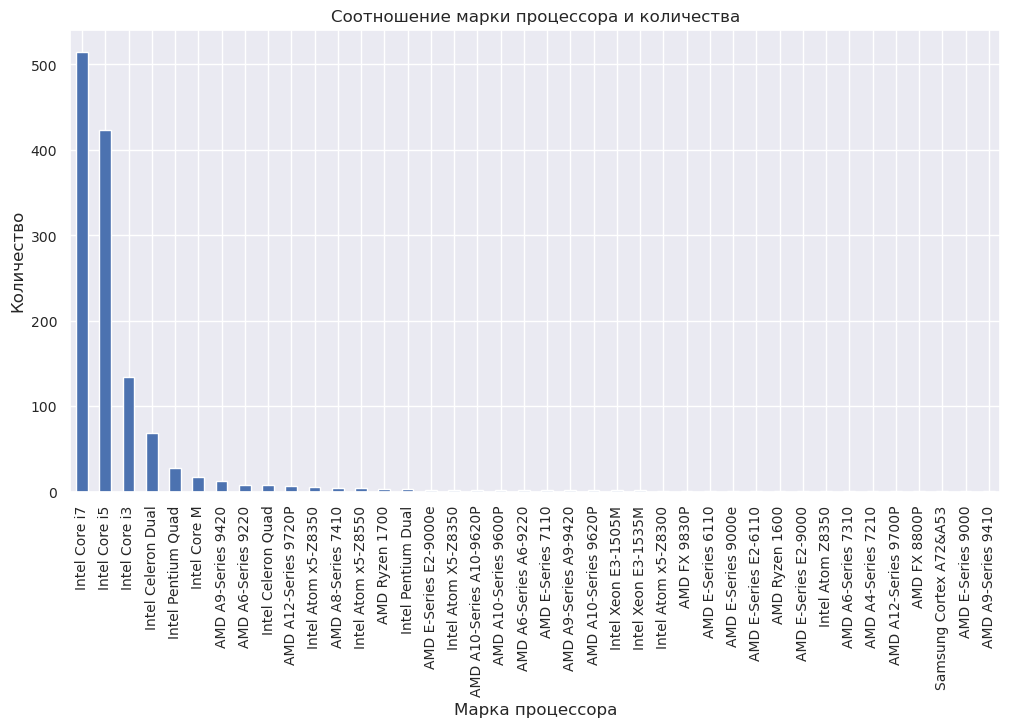

In [63]:
plt.figure(figsize = (12, 6))
data['cpu_name'].value_counts().plot(kind = 'bar')
plt.title('Соотношение марки процессора и количества')
plt.xlabel('Марка процессора')
plt.ylabel('Количество')
plt.show()

Сгруппируем данные по маркам процессоров

In [64]:
def cpu_brand_group(name):
    if name in ('Intel Core i7', 'Intel Core i5', 'Intel Core i3'):
        return name
    elif 'AMD A6-Series' in name:
        return 'AMD A6-Series'
    elif 'AMD A8-Series' in name:
        return 'AMD A8-Series'
    elif 'AMD A10-Series' in name:
        return 'AMD A10-Series'
    elif 'AMD A12-Series' in name:
        return 'AMD A10-Series'
    elif 'Intel' in name:
        return 'Процессор Intel'
    elif 'AMD' in name:
        return 'Процессор AMD'
    else:
        return 'Другой процессор'

In [65]:
data['brand_cpu'] = data['cpu_name'].apply(cpu_brand_group)

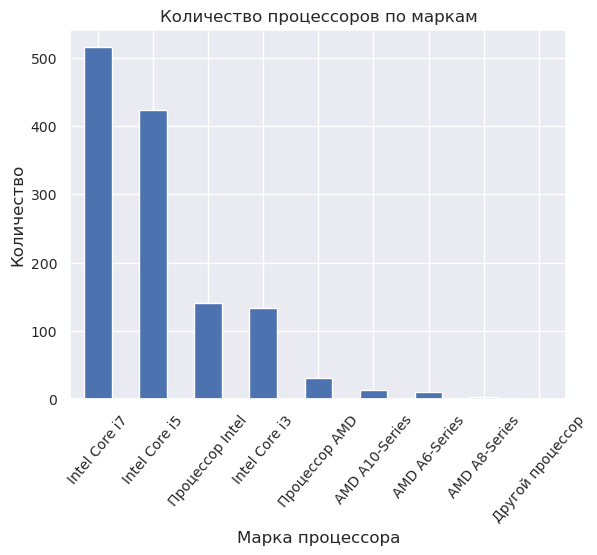

In [66]:
plt.figure()
data['brand_cpu'].value_counts().plot(kind = 'bar')
plt.title('Количество процессоров по маркам')
plt.xlabel('Марка процессора')
plt.ylabel('Количество')
plt.xticks(rotation = 50)
plt.show()

Самые распространенные процессоры Intel, среди которых наибольшую долю замимают процессоры семейства i7, на втором месте
семейство i5. Процессоры AMD  занимают очень малую долю по сравнению с Intel

Рассмотрим зависимость цены от производителя и марки процессора

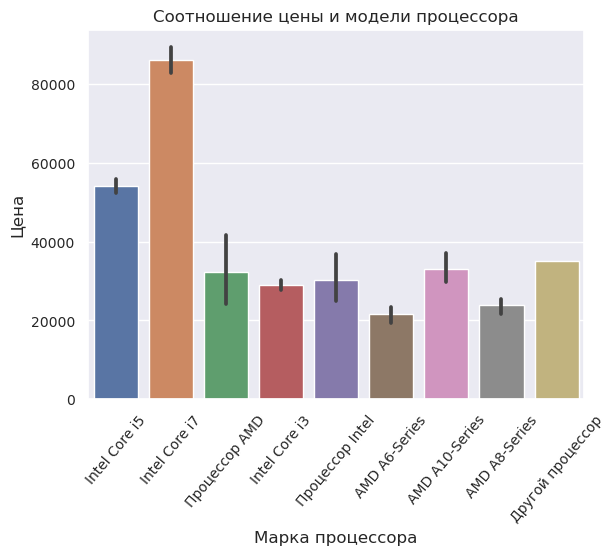

In [67]:
plt.figure()
sns.barplot(x = data['brand_cpu'], y = data['price'])
plt.xticks(rotation = 90)
plt.title('Соотношение цены и модели процессора')
plt.xlabel('Марка процессора')
plt.ylabel('Цена')
plt.xticks(rotation = 50)
plt.show()

По стоимости лидируют процессоры Intel, наибольшую стоимость имеет семейство процессоров i7, следом идет семейство i5

**Посмотрим на корреляцию данных относительно цены**

In [68]:
decimal_columns = data.select_dtypes(['int16', 'int32', 'int64', 'float16', 'float32', 'float64']).columns
decimal_data = data[decimal_columns]
correlation = decimal_data.corr()['price']

In [69]:
correlation

inches            0.066990
price             1.000000
type_screen       0.188631
resolution_x      0.552074
resolution_y      0.548111
screen_process    0.250358
ram_decimal       0.740106
memory_type       0.302367
Name: price, dtype: float64

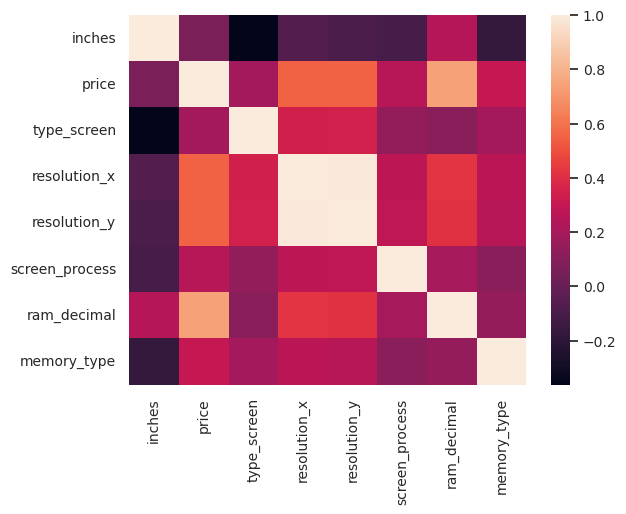

In [70]:
plt.figure()
sns.heatmap(decimal_data.corr())
plt.show()

Наибольшая корреляция наблюдается между объемом оперативной памяти и ценой, средняя корреляция- между ценой и  разрешением
экрана, а низкая - между типом встроенной памяти и ценой

**Графический процессор ноутбука**

In [71]:
data['name_gpu'] = data['gpu'].apply(lambda x: ''.join(x.split()[:1]))

In [72]:
data['name_gpu'].value_counts()

name_gpu
Intel     703
Nvidia    396
AMD       174
ARM         1
Name: count, dtype: int64

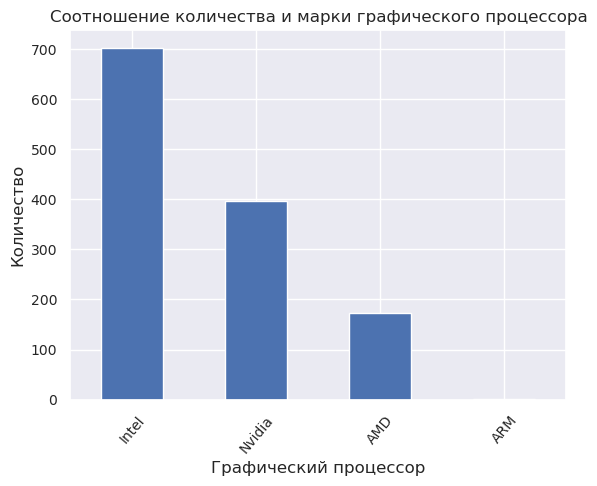

In [73]:
plt.figure()
data['name_gpu'].value_counts().plot(kind = 'bar')
plt.title('Соотношение количества и марки графического процессора')
plt.xlabel('Графический процессор')
plt.ylabel('Количество')
plt.xticks(rotation = 50)
plt.show()

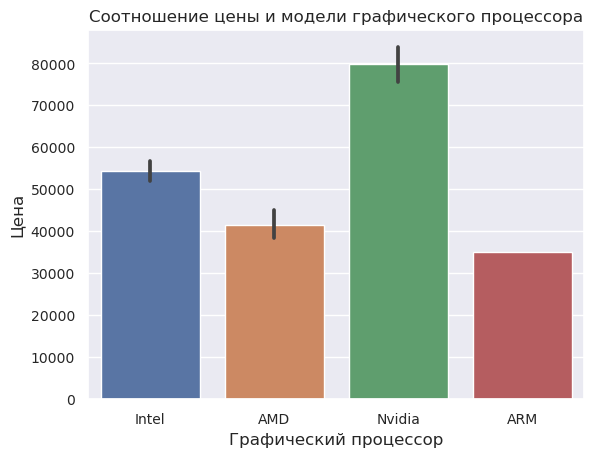

In [74]:
plt.figure()
sns.barplot(x = data['name_gpu'], y = data['price'])
plt.title('Соотношение цены и модели графического процессора')
plt.xlabel('Графический процессор')
plt.ylabel('Цена')
plt.show()

Самый распространенный графический процессор Intel, затем идет Nvidia и замыкает тройку AMD. По сотношению к цене на
первом месте Nvidia, на втором Intel и на третьем AMD

**Рассмотрим влияние установленной операционной системы**

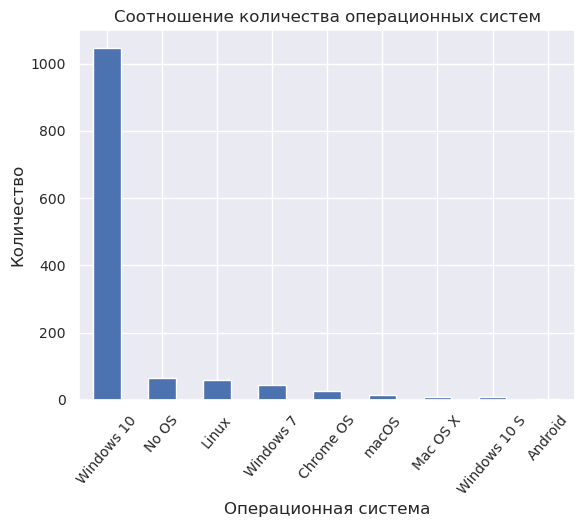

In [75]:
plt.figure()
data['op_sys'].value_counts().plot(kind = 'bar')
plt.title('Соотношение количества операционных систем')
plt.xlabel('Операционная система')
plt.ylabel('Количество')
plt.xticks(rotation = 50)
plt.show()

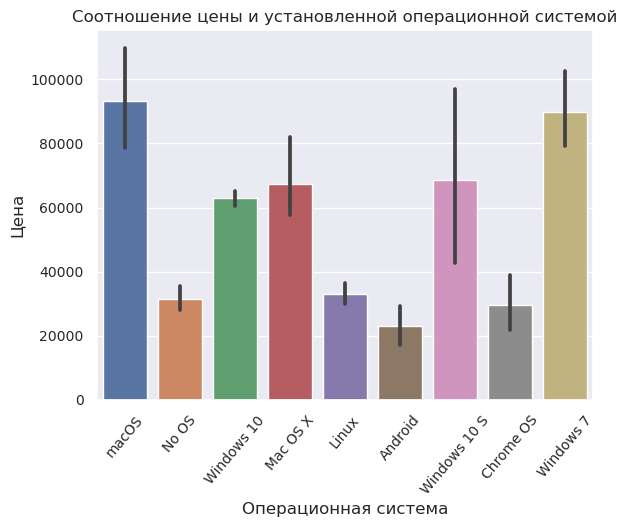

In [76]:
plt.figure()
sns.barplot(x = data['op_sys'], y = data['price'])
plt.title('Соотношение цены и установленной операционной системой')
plt.xlabel('Операционная система')
plt.ylabel('Цена')
plt.xticks(rotation = 50)
plt.show()

Самая распространенная операционная система-  семейство Windows, среди которых наибольшее распространение имеет Windows 10. На втором месте по популярности- ноутбуки без установленной операционной системы. И на третьем месте- семейство на базе ядра Linux.
При рассмотрении цены ноутбука в зависимости от установленной операционной системы, наблюдается несколько другая картина: на первом месте по стоимости ноутбука выходит операционная система macOS, далее ноутбуки с предустановленной Windows и на третьем месте - Linux  и почти с таким же результатом ноутбуки без предустановленной ОС.

### Выводы

Какие характеристики и параметры оказывают влияние на цену ноутбука:
1. Производитель
2. Тип и формфактор ноутбука
3. Технология изготовления, диагональ и разрешение экрана экрана
4. Центральный процессор
5. Тип и размер внутренней памяти
6. Объем оперативной памяти
7. Графический процессор
8. Операционная система

* Наибольшая корреляция- между ценой ноутбука и объемом оперативной памяти

* Средняя корреляция - между ценой и разрешением экрана

* Низкая корреляция- между ценой и типом втроенной памяти, между ценой и технологией изготовления экрана


* Наибольшее влияние бренда на цену: Apple, Ryzen

* Самые дорогие устройства- рабочие станции, далее игровые ноутбуки и ультрабуки

* Не стандартная диагональ экрана значительно увеличивает цену ноутбука

* Использование сенсорного экрана повышает стоимость устройства

* Применение более качественного экрана, изготовленного по технологии IPS ведет к удорожанию продукта

* С ростом разрения экрана- растет стоимость устройства

* Объем оперативной памяти имеет самое сильное влияние на цену

* Применение SSD накопителя и размер памяти не значительно увеличивает цену устройства в контексте с другими параметрами

* Применение процессоров Intel заметно сказывается на стоимости устройства, причем чем выше модель процессора тем цена более возрастает

* Применение дискретной графики Nvidia увеличивает стоимость

* Самые дорогие ноутбуки с предустановленной операционной системой macOS, на втором месте Windows, на третьем- Linux и ноутбуки без ОС
